<a href="https://colab.research.google.com/github/karenrivgi/talleresGoogleColab/blob/main/Taller_09_scikit_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##«*Verdaderamente, el azar tiene mucho poder sobre nosotros, puesto que, si vivimos, es por azar.*»
### [Séneca](https://es.wikipedia.org/wiki/S%C3%A9neca)

### Elementos de una imagen

Una imagen es un conjunto de pixeles, que para un computador se puede visualizar como un array, donde cada posición corresponde a un pixel.

El color de cada pixel viene dado por un protocolo, el más famoso RGB, donde cada color puede representarse como un decimal (0-255), un binario, o un porcentaje

**Cada operación con una imagen tiene detrás una transformacion matemática**, por ejemplo para pasar una imagen para la escala de grises se aplica: Y =0.2125R + 0.7154G + 0.0721B, la librería que usaremos ya tiene unos métodos para hacer este tratamiento.

También se puede separar en capas, aislar el componente R, G o B de la imagen, y otras aplicaciones que abordaremos en el taller.

En blanco y negro la imagen es 2D, si es a color 3D

# Taller 09 procesamiento de imágenes con scikit-image
En este taller aprenderá los conceptos básicos de Python 3 relativos al procesamiento de imágenes con la librería [scikit_image](https://scikit-image.org/).

scikit_image  **no es una librería nativa** de Python por lo que **requiere ser instalada antes de ser invocada**. Sin embargo, esta librería sí está preinstalada en Google Colaboratory por lo que basta invocarla para poder usar sus funcionalidades.

## Referencias

Este taller se basa en información e ideas recopiladas de las siguientes fuentes:

* [scikit-image User Guide](https://scikit-image.org/docs/dev/user_guide)

* [scikit-image General examples](https://scikit-image.org/docs/dev/auto_examples/)

* [scikit-image docs](https://scikit-image.org/docs/0.17.x/)

* [9 Powerful Tips and Tricks for Working with Image Data using skimage in Python](https://www.analyticsvidhya.com/blog/2019/09/9-powerful-tricks-for-working-image-data-skimage-python/)

* [Understanding and Decoding a JPEG Image using Python](https://yasoob.me/posts/understanding-and-writing-jpeg-decoder-in-python/)

* [10 Python image manipulation tools](https://opensource.com/article/19/3/python-image-manipulation-tools)

* [Generate color schemes](https://www.webfx.com/web-design/color-picker/)

La asignatura [Visión Artificial](https://github.com/alceballosa/Vision-Artificial-UNALMed) le permitirá profundizar en contenidos asociados con imágenes y vídeos.

# skimage

##  00.Cargar imágenes desde banco de imágenes

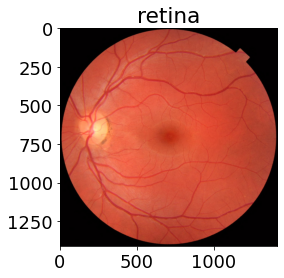

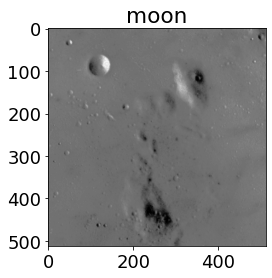

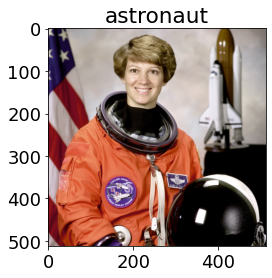

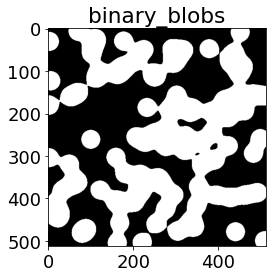

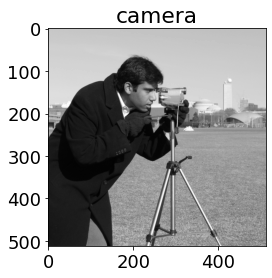

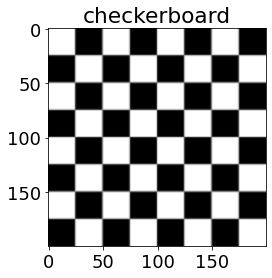

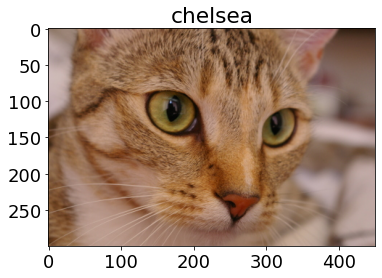

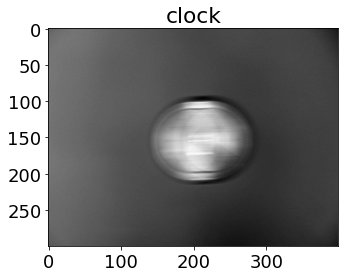

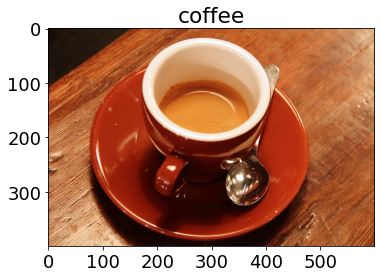

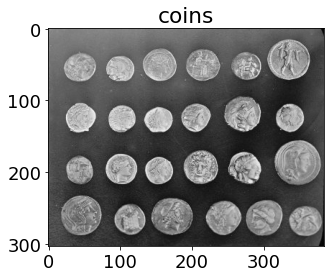

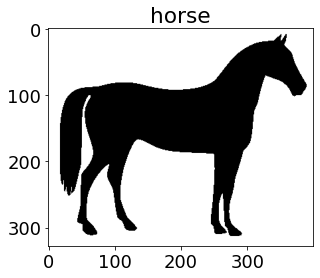

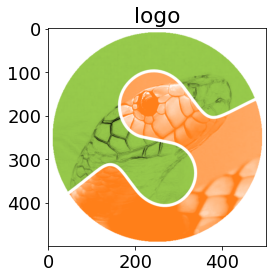

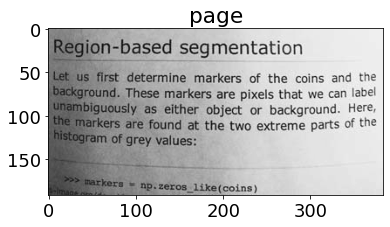

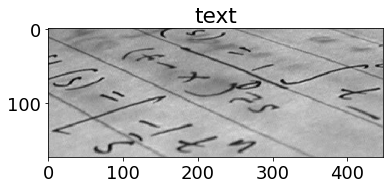

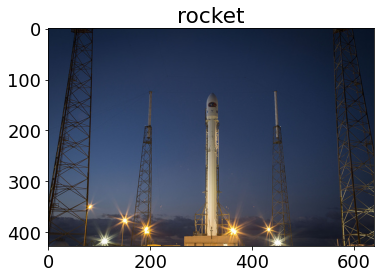

In [15]:
# Importar las librerías requeridas
import matplotlib.pyplot as plt
import matplotlib

from skimage import data # Base de datos con imagenes de skimage

# Establecer el tipo de fuente de las imágenes
matplotlib.rcParams['font.size'] = 18

# cargar algunas imágenes que están en la base de datos de skimage
images = ('retina', 'moon', 'astronaut',
          'binary_blobs',
          'camera',
          'checkerboard',
          'chelsea',
          'clock',
          'coffee',
          'coins',
          'horse',
          'logo',
          'page',
          'text',
          'rocket',
          )

# Mostrar las imágenes cargadas
for name in images:
    caller = getattr(data, name) # Obtener la imagen y el nombre y guardarlo en caller
    image = caller()
    plt.figure()
    plt.title(name)
    plt.imshow(image)

plt.show()

## 01.Cargar imágenes desde archivo

In [16]:
# Importar las librerías requeridas
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

# Cargar imagen, con imread
#jugador = imread('player.png')
#caras = imread('image_03_caras.jpg')
jugador = imread('player.png', as_gray=True)
#jugador = imread('player.png', as_gray=True)

# Mostrar imagen
imshow(jugador)
#imshow(caras)

FileNotFoundError: ignored

## 02.Convertir a escala de grises

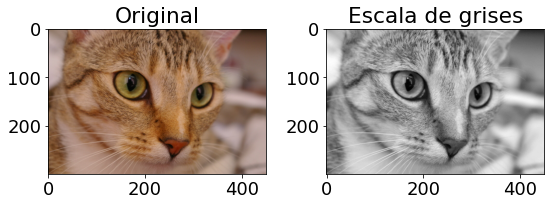

In [18]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

# Cargar imagen
original = data.chelsea() 
# original = data.coffee()
# original = data.horse()
# original = data.stereo_motorcycle()
#original = data.astronaut()

# Convertir imagen a escala de grises
grayscale = rgb2gray(original)

# Mostrar imagen original e imagen transformada usando matplotlib
                        #F  C   Tamaño
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")

ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Escala de grises")

fig.tight_layout()
plt.show()

## 03.Cambiar tamaño de la imagen

Modificada el tamaño de la imagen a un tamaño definido por el usuario

In [20]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import resize
from skimage.io import imread, imshow


# Cargar la imagen
#original = data.chelsea()
original = imread('player.png')

# Cambiar el tamaño de la imagen
#resize image
nueva = resize(original, (500, 500))

# Mostrar las imágenes
#plot images
plt.subplot(121), imshow(original)
plt.title('Original')
plt.subplot(122), imshow(nueva)
plt.title('Modificada')
plt.show()

FileNotFoundError: ignored

## 04.Escalar el tamaño de la imagen

Modifica el tamaño de la imagen de manera proporcional. Útil cuando las imágenes son de distinto tamaño o cuando no se conoce el tamaño de la imagen

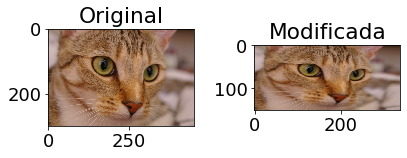

In [21]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import rescale
from skimage.io import imread, imshow


# Cargar las imágenes
original = data.chelsea()
# original = imread('player.png')

# Escalar la imagen
#rescale image
nueva = rescale(original, scale=(0.5, 0.75, 1))
#nueva = rescale(original, scale=(2, 4, 1))

# Mostrar las imágenes
#plot images
plt.subplot(121), imshow(original)
plt.title('Original')
plt.subplot(122), imshow(nueva)
plt.title('Modificada')
plt.show()


## 05.Rotar una imagen

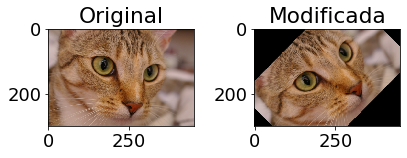

In [22]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import rotate
from skimage.io import imread, imshow

# Cargar la imagen
original = data.chelsea()
# original = imread('player.png')

# Rotar la imagen
nueva = rotate(original, angle=45)
#nueva = rotate(original, angle=360)

# Mostrar las imágenes
plt.subplot(121), imshow(original)
plt.title('Original')
plt.subplot(122), imshow(nueva)
plt.title('Modificada')
plt.show()

## 06.Generar imagen espejo horizontal

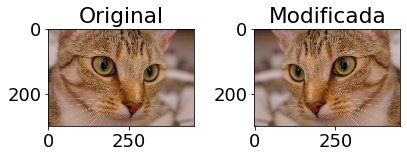

In [23]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.io import imread, imshow

# Cargar las imágenes
original = data.chelsea()
#original = imread('player.png')

# Espejo horizontal imagen
nueva = np.fliplr(original)

# Mostrar imágenes
plt.subplot(121), imshow(original)
plt.title('Original')
plt.subplot(122), imshow(nueva)
plt.title('Modificada')
plt.show()

## 07.Generar imagen espejo vertical

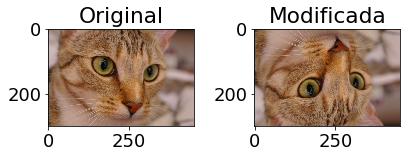

In [24]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.io import imread, imshow

# Cargar imágenes
original = data.chelsea()
#original = imread('player.png')

# Espejo vertical imagen
nueva = np.flipud(original)

# Mostrar imágenes
plt.subplot(121), imshow(original)
plt.title('Original')
plt.subplot(122), imshow(nueva)
plt.title('Modificada')
plt.show()


## 08.Recortar una imagen

(300, 451, 3)


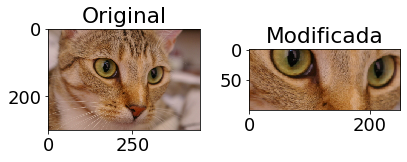

In [25]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import resize
from skimage.io import imread, imshow


# Cargar imágenes
original = data.chelsea()

# original = imread('player.png')

print(original.shape)

# Recortar imagen 
nueva = original[100:(original.shape[0]-100),100:(original.shape[1]-100)]

# Mostrar impagenes
plt.subplot(121), imshow(original)
plt.title('Original')
plt.subplot(122), imshow(nueva)
plt.title('Modificada')
plt.show()

## 09."Revolver" una imagen

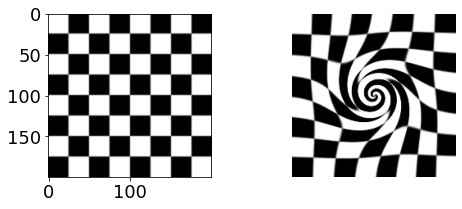

In [26]:
# Importar librerías necesarias
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import swirl

# Cargar imagen de referencia
image = data.checkerboard()
#image = data.chelsea()

# "Revolver" imagen
swirled = swirl(image, rotation=0, strength=10, radius=120)
#swirled = swirl(image, rotation=90, strength=25, radius=240)

# Mostrar imagen original e imagen transformada
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('on')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

plt.show()

## Otro ejemplo de imagen "revuelta"

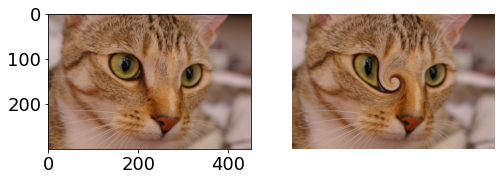

In [27]:
# Importar las librerías requeridas
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import swirl

# Cargar imagen original
image = data.chelsea()

# "Revolver" imagen
swirled = swirl(image, rotation=0, strength=10, radius=100)

# Mostrar imagen original e imagen transformada
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),
                               sharex=True, sharey=True)

ax0.imshow(image, cmap=plt.cm.gray)
ax0.axis('on')
ax1.imshow(swirled, cmap=plt.cm.gray)
ax1.axis('off')

plt.show()

# Aplicaciones

## Identificar patrones dentro de un objeto

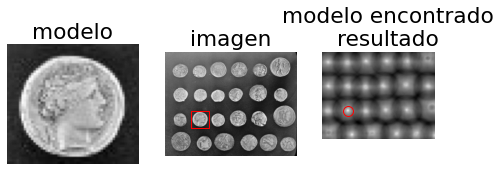

In [28]:
# Importar las librerías requeridas
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.feature import match_template

# Cargar imagen
image = data.coins()

# Seleccionar modelo
coin = image[170:220, 75:130]

# Buscar las imágenes que se ajustan al patrón
result = match_template(image, coin)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

# Mostrar la imagen
fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(coin, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('modelo')

ax2.imshow(image, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('imagen')

# Resaltar región de equivalencia
hcoin, wcoin = coin.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('modelo encontrado\nresultado')

# resaltar región de equivalencia
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()

## Detectar caras en una imagen

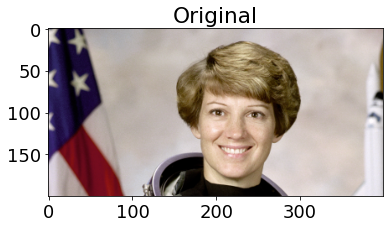

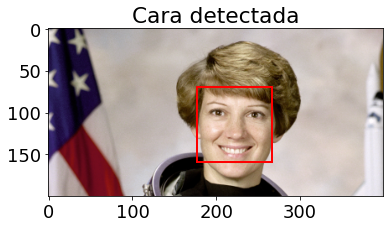

In [29]:
# Importar las librerías necesarias
from skimage import data
from skimage.feature import Cascade

import matplotlib.pyplot as plt
from matplotlib import patches

# Cargar el archivo entrenado desde el módulo root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Inicializar el detector con Cascade
detector = Cascade(trained_file)

# Cargar la imagen a analizar
imagen = data.astronaut()
img = imagen[0:200,0:400] # Recortar imagen en base a los "pixeles" del arreglo, primero de arriba abajo, luego de izquierda a derecha
#img = imread('player.png')

# Mostrar la imagen original
plt.imshow(img)
plt.title('Original')

plt.show()

# Detectar las caras en la imagen
detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))


plt.imshow(img)

img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )
plt.title('Cara detectada')
plt.show()

In [30]:
from skimage import data
from skimage.feature import Cascade
from skimage import io

import matplotlib.pyplot as plt
from matplotlib import patches

# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade.
detector = Cascade(trained_file)

# cargar imagen
original = io.imread('player.png')


img = io.imread('player.png')

#plot images
plt.imshow(img)
plt.title('Original')

plt.show()

detected = detector.detect_multi_scale(img=img,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(60, 60),
                                       max_size=(123, 123))

plt.imshow(img)
img_desc = plt.gca()
plt.set_cmap('gray')

for patch in detected:

    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )
plt.title('Caras detectadas')
plt.show()



FileNotFoundError: ignored

# Ejercicios



## 00

Seleccione tres imágenes diferentes a las utilizadas en el taller y apliqueles los cambios indicados en las actividades 02 a 09.

**Muestre las tres imágenes, junto con los cambios, en una sola figura**.

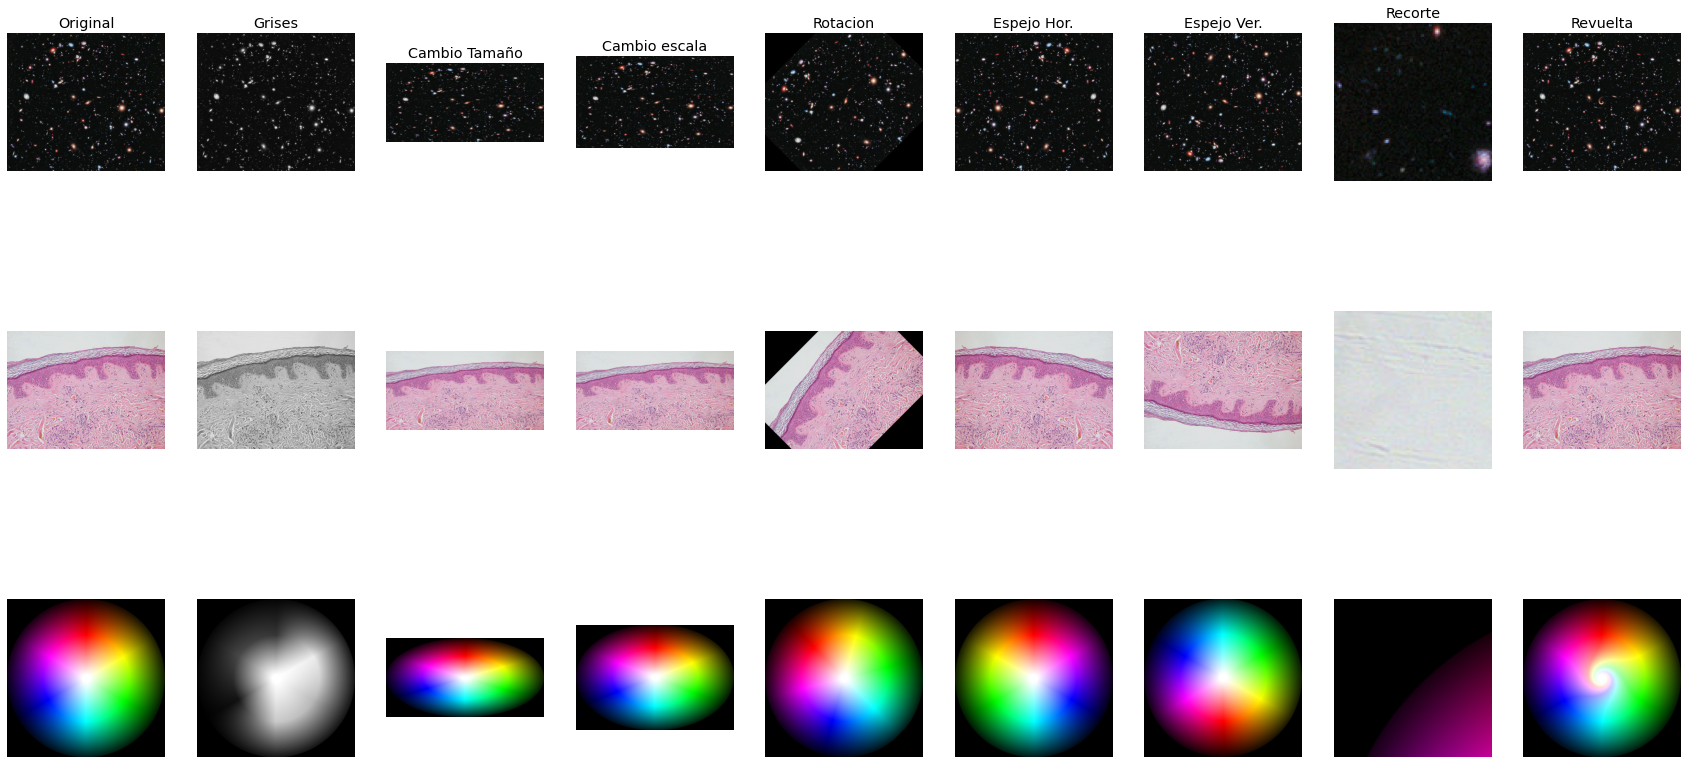

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.transform import resize
from skimage.io import imread, imshow
from skimage.color import rgb2gray

imagenesO = [data.hubble_deep_field(), data.skin(), data.colorwheel()]

images = []

i = 0;
while i < len(imagenesO):
  img = imagenesO[i]
  images.append(img)
  images.append(rgb2gray(img))
  images.append(resize(img, (250, 500)))
  images.append(rescale(img, scale=(0.5, 0.75, 1)))
  images.append(rotate(img, angle=45))
  images.append(np.fliplr(img))
  images.append(np.flipud(img))
  images.append(img[0:100,0:100])
  images.append(swirl(img, rotation=0, strength=10, radius=120))
  i += 1


# create figure
fig = plt.figure(figsize=(30, 15))

# setting values to rows and column variables
rows = 3
columns = 9
matplotlib.rcParams['font.size'] = 12

titulos = ['Original', 'Grises', 'Cambio Tamaño', 'Cambio escala', 'Rotacion', 'Espejo Hor.', 'Espejo Ver.', 'Recorte', 'Revuelta']


for i in range(1,len(images)+1):
  fig.add_subplot(rows, columns, i)
  plt.imshow(images[i-1])
  plt.axis('off')
  if i<= 9:
    	plt.title(titulos[i-1])



## 01

Explore los [Ejemplos generales](https://scikit-image.org/docs/dev/auto_examples/) de la librería scikit-image

Number of coordinates: 22 704 26


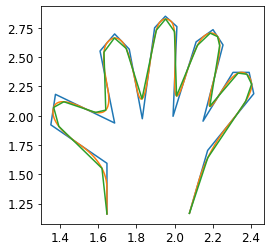

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import ellipse
from skimage.measure import find_contours, approximate_polygon, \
    subdivide_polygon


hand = np.array([[1.64516129, 1.16145833],
                 [1.64516129, 1.59375],
                 [1.35080645, 1.921875],
                 [1.375, 2.18229167],
                 [1.68548387, 1.9375],
                 [1.60887097, 2.55208333],
                 [1.68548387, 2.69791667],
                 [1.76209677, 2.56770833],
                 [1.83064516, 1.97395833],
                 [1.89516129, 2.75],
                 [1.9516129, 2.84895833],
                 [2.01209677, 2.76041667],
                 [1.99193548, 1.99479167],
                 [2.11290323, 2.63020833],
                 [2.2016129, 2.734375],
                 [2.25403226, 2.60416667],
                 [2.14919355, 1.953125],
                 [2.30645161, 2.36979167],
                 [2.39112903, 2.36979167],
                 [2.41532258, 2.1875],
                 [2.1733871, 1.703125],
                 [2.07782258, 1.16666667]])

# subdivide polygon using 2nd degree B-Splines
new_hand = hand.copy()
for _ in range(5):
    new_hand = subdivide_polygon(new_hand, degree=2, preserve_ends=True)

# approximate subdivided polygon with Douglas-Peucker algorithm
appr_hand = approximate_polygon(new_hand, tolerance=0.02)

print("Number of coordinates:", len(hand), len(new_hand), len(appr_hand))

fig, ax1= plt.subplots(figsize=(4, 4))

ax1.plot(hand[:, 0], hand[:, 1])
ax1.plot(new_hand[:, 0], new_hand[:, 1])
ax1.plot(appr_hand[:, 0], appr_hand[:, 1])


plt.show()

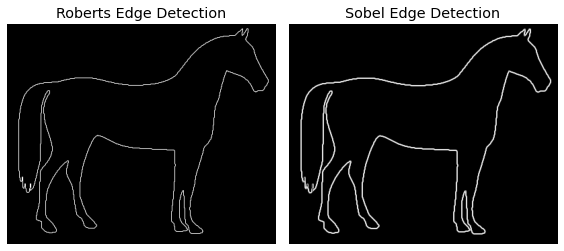

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.data import camera, horse
from skimage.util import compare_images


image = horse()
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

## 02
